In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
im_path = 'coins.png'
im_bgr  = cv2.imread(im_path)
im_gray  = cv2.imread(im_path, cv2.COLOR_BGR2GRAY)

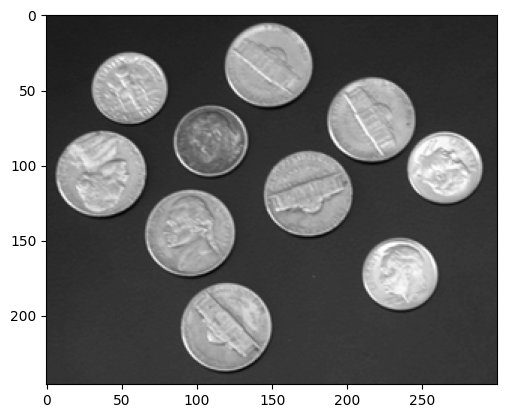

In [3]:
plt.imshow(im_gray, cmap='gray')

In [5]:
thres, im_bin = cv2.threshold(im_gray, thresh = 0 , maxval = 255, type = cv2.THRESH_BINARY + cv2.THRESH_OTSU)
thres

126.0

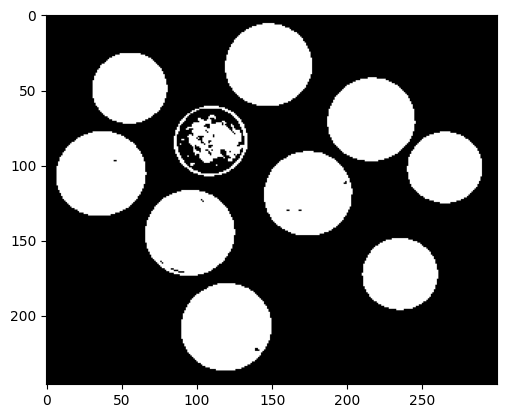

In [6]:
plt.imshow(im_bin, cmap='gray')

In [7]:
kernel = np.ones((3,3),np.uint8)
im_dilation = cv2.dilate(im_bin,kernel,iterations = 1)
kernel = np.ones((3,3),np.uint8)
im_closing = cv2.morphologyEx(im_dilation, cv2.MORPH_CLOSE, kernel)

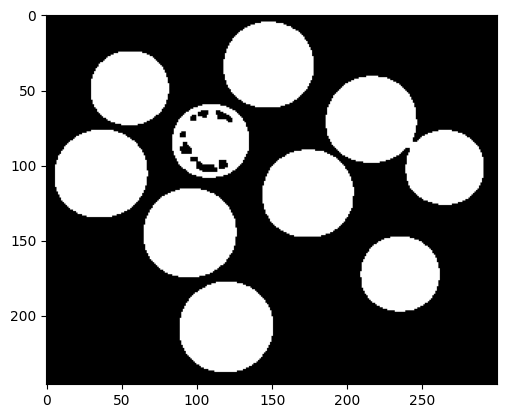

In [8]:
plt.imshow(im_closing, cmap='gray')

label 수: 9


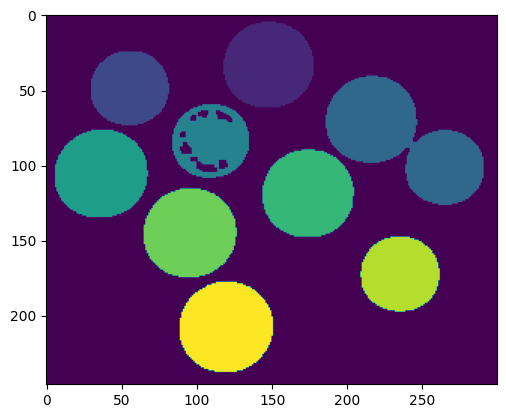

In [9]:
ret, im_labels = cv2.connectedComponents(im_closing)  # ret 는 레이블(연결된 영역수)
print('label 수:', ret - 1)  # 0은 백그라운드라서 제외 함
plt.imshow(im_labels)

In [10]:
np.unique(im_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [22]:
contours, hierarchy = cv2.findContours(im_closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#contours, hierarchy = cv2.findContours(im_closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [23]:
len(contours)


16

In [24]:
contours[0].shape,contours[1].shape,


((80, 1, 2), (78, 1, 2))

In [18]:
contours[0]

array([[[113, 178]],

       [[112, 179]],

       [[110, 179]],

       [[109, 180]],

       [[107, 180]],

       [[105, 182]],

       [[104, 182]],

       [[103, 183]],

       [[102, 183]],

       [[100, 185]],

       [[ 99, 185]],

       [[ 95, 189]],

       [[ 95, 190]],

       [[ 93, 192]],

       [[ 93, 193]],

       [[ 92, 194]],

       [[ 92, 195]],

       [[ 91, 196]],

       [[ 91, 197]],

       [[ 90, 198]],

       [[ 90, 201]],

       [[ 89, 202]],

       [[ 89, 216]],

       [[ 90, 217]],

       [[ 90, 219]],

       [[ 91, 220]],

       [[ 91, 221]],

       [[ 92, 222]],

       [[ 92, 223]],

       [[ 93, 224]],

       [[ 93, 225]],

       [[100, 232]],

       [[101, 232]],

       [[103, 234]],

       [[104, 234]],

       [[105, 235]],

       [[107, 235]],

       [[108, 236]],

       [[111, 236]],

       [[112, 237]],

       [[126, 237]],

       [[127, 236]],

       [[130, 236]],

       [[131, 235]],

       [[132, 235]],

       [[1

In [26]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [13,  4,  6, -1],
        [ 7, -1, -1,  5],
        [ 8,  6, -1,  5],
        [ 9,  7, -1,  5],
        [10,  8, -1,  5],
        [11,  9, -1,  5],
        [12, 10, -1,  5],
        [-1, 11, -1,  5],
        [14,  5, -1, -1],
        [15, 13, -1, -1],
        [-1, 14, -1, -1]]], dtype=int32)

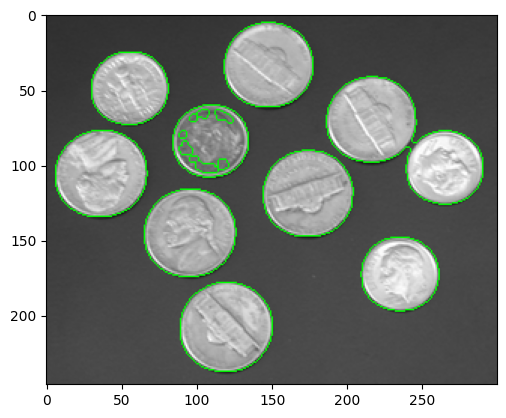

In [31]:
im_bgr1 = im_bgr.copy()
cv2.drawContours(im_bgr, contours, -1, (0,255,0), 1)
plt.imshow(im_bgr[:,:,::-1])

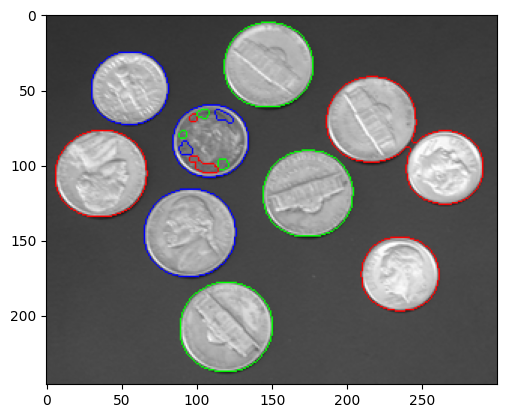

In [32]:
for i in range(len(contours)):
    if i%3 == 0:
        cv2.drawContours(im_bgr, contours, i, (0,255,0), 1)
    elif i%3 == 1:
        cv2.drawContours(im_bgr, contours, i, (0,0,255), 1)    
    else:
        cv2.drawContours(im_bgr, contours, i, (255,0, 0), 1)    
plt.imshow(im_bgr[:,:,::-1])